In [15]:
with open('training.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [16]:
train_x = []
train_y = []
x = []
y = []

lines = [line.strip() for line in text.split('\n')]
for line in lines[1:]:
    w = line.split('\t')
    if len(w) == 2:
        train_x.append(w[0].strip().lower())
        train_y.append(w[1].strip().lower())
        x.append(w[0].strip().lower())
        y.append(w[1].strip().lower())


In [17]:
train_x[:10]

['calvin klein in2u eau de toilette  -  150 ml (for men)',
 'for the love of physics (paperback)',
 'nike fission deodorant spray  -  200 ml (for men)',
 'spoken english (with cd) 2nd edition (paperback)',
 'the c++ programming language 3 edition (paperback)',
 'sony cybershot dsc-w610 point & shoot (black)',
 'ibps bank probationary officers management trainees common written exam. 1st edition (paperback)',
 'tommy hilfiger analog watch  - for women (silver)',
 "dr. seuss's beginner book collection (boxed set)",
 'panasonic sdr-s15 camcorder (silver)']

In [18]:
train_y[:10]

['calvin klein',
 'physics',
 'nike-deodrant',
 'spoken english',
 'c programming',
 'sony cybershot',
 'written english',
 'tommy watch',
 'best-seller books',
 'camcorder']

In [19]:
split = 0.8
total = len(train_x)
train_split = int(total*split)
print('training data size : ', train_split)
print('testing data size : ', (total-train_split))

v_train_x = train_x[:train_split]
v_train_y = train_y[:train_split]

v_test_x = train_x[train_split:]
v_test_y = train_y[train_split:]


training data size :  88
testing data size :  23


# Model Selection & Performance

## K-Fold Cross validation


<b>Code Sample :</b>

<code>
from sklearn.model_selection import cross_val_score
print(len(set(v_train_y)))
accuracies = cross_val_score(estimator = nb_classifier, X=train_x, y=v_train_y, cv=4)
print('All accuracies ', accuracies)
print('Mean accuracies ', accuracies.mean())
print('Std accuracies ', accuracies.std())
</code>

## Grid Search

<b>Code Sample (MultinomialNB) :</b>

<code>
from sklearn.model_selection import GridSearchCV
parameters = [
    { 'alpha':[1.0, 0.0], 'fit_prior':[True, False] },
    { 'alpha':[3.0, 2.0, 1.0, 0.0], 'fit_prior':[True, False] }
]

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=parameters, scoring='accuracy', cv=8, n_jobs=-1)
grid_search_result = grid_search.fit(train_x, v_train_y)

print('Best accuracy ', grid_search_result.best_score_)
print('Best params ', grid_search_result.best_params_)
</code>


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = MultinomialNB(alpha=1.0, fit_prior=False)
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(v_test_y, y_predict)
#print(cm)

from sklearn.model_selection import cross_val_score
print(len(set(v_train_y)))
accuracies = cross_val_score(estimator = nb_classifier, X=train_x, y=v_train_y, cv=8)
print('All accuracies ', accuracies)
print('Mean accuracies ', accuracies.mean())
print('Std accuracies ', accuracies.std())


from sklearn.model_selection import GridSearchCV
parameters = [
    { 'alpha':[1.0, 0.0], 'fit_prior':[True, False] },
    { 'alpha':[3.0, 2.0, 1.0, 0.0], 'fit_prior':[True, False] }
]

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=parameters, scoring='accuracy', cv=8, n_jobs=-1)
grid_search_result = grid_search.fit(train_x, v_train_y)

print('Best accuracy ', grid_search_result.best_score_)
print('Best params ', grid_search_result.best_params_)


Accuracy  0.521739130435
Actual ----------------- Predicted
sony cybershot ----------------- sony cybershot
chemistry ----------------- data structures algorithms
sony cybershot ----------------- sony cybershot
physics ----------------- written english
spoken english ----------------- spoken english
written english ----------------- written english
camcorder ----------------- sony cybershot
c programming ----------------- c programming
camcorder ----------------- sony cybershot
camera ----------------- camera
physics ----------------- physics
timex watch ----------------- tommy watch
chemistry ----------------- data structures algorithms
c programming ----------------- data structures algorithms
mathematics ----------------- chemistry
camera ----------------- sony cybershot
sony cybershot ----------------- sony cybershot
titan watch ----------------- titan watch
c programming ----------------- data structures algorithms
spoken english ----------------- spoken english
best-seller books 

D:\Users\Samriddha.Chatterjee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
D:\Users\Samriddha.Chatterjee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


Best accuracy  0.795454545455
Best params  {'alpha': 1.0, 'fit_prior': False}


# Multinomial Naive Bayes with Count Vectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

vectorizer = CountVectorizer()
train_x = vectorizer.fit_transform(v_train_x)

nb_classifier = MultinomialNB()
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

Accuracy  0.391304347826
Actual ----------------- Predicted
sony cybershot ----------------- sony cybershot
chemistry ----------------- data structures algorithms
sony cybershot ----------------- sony cybershot
physics ----------------- written english
spoken english ----------------- written english
written english ----------------- written english
camcorder ----------------- sony cybershot
c programming ----------------- written english
camcorder ----------------- sony cybershot
camera ----------------- nike-deodrant
physics ----------------- physics
timex watch ----------------- tommy watch
chemistry ----------------- data structures algorithms
c programming ----------------- data structures algorithms
mathematics ----------------- best-seller books
camera ----------------- sony cybershot
sony cybershot ----------------- sony cybershot
titan watch ----------------- titan watch
c programming ----------------- data structures algorithms
spoken english ----------------- spoken english


# Naive Bayes Classifier


### Deriving Bayes Theorem from Conditional Probablity

P(A|B) = P(A &#8745; B)|P(B) ==> P(A &#8745; B) = P(A|B) * P(B)
P(B|A) = P(B &#8745; A)|P(A) ==> P(B &#8745; A) = P(B|A) * P(A)

P(A &#8745; B) = P(B &#8745; A)

So, P(A|B) * P(B) = P(B|A) * P(A)

P(B|A) = P(A|B) * P(B) / P(A)

<img src='./images/bayes_theorem.png'>
<img src='./images/bayes_theorem_1.png'>

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

### Multinomial Naive Bayes

With a multinomial event model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial 
( p 1 , … , p n ) where pi is the probability that event i occurs (or K such multinomials in the multiclass case). A feature vector x = ( x 1 , … , x n ) is then a histogram, with xi counting the number of times event i was observed in a particular instance. <b>This is the event model typically used for document classification</b>.

the multinomial distribution is a generalization of the binomial distribution.
For example, it models the probability of counts for rolling a k-sided die n times. For n independent trials each of which leads to a success for exactly one of k categories, with each category having a given fixed success probability, the multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories.

When k is 2 and n is 1, the multinomial distribution is the Bernoulli distribution. When k is 2 and n is bigger than 1, it is the binomial distribution. When n is 1, it is the categorical distribution.

### Gaussian Naive Bayes

When k is 2 and n is 1, the multinomial distribution is the Bernoulli distribution. When k is 2 and n is bigger than 1, it is the binomial distribution. When n is 1, it is the categorical distribution.


### Bernoullis Naive Bayes

In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks,[9] where binary term occurrence features are used rather than term frequencies


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = MultinomialNB()
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(v_test_y, y_predict)
print(cm)

Accuracy  0.304347826087
Actual ----------------- Predicted
sony cybershot ----------------- sony cybershot
chemistry ----------------- data structures algorithms
sony cybershot ----------------- sony cybershot
physics ----------------- written english
spoken english ----------------- written english
written english ----------------- written english
camcorder ----------------- dslr canon
c programming ----------------- written english
camcorder ----------------- dslr canon
camera ----------------- camera
physics ----------------- best-seller books
timex watch ----------------- tommy watch
chemistry ----------------- data structures algorithms
c programming ----------------- written english
mathematics ----------------- written english
camera ----------------- sony cybershot
sony cybershot ----------------- sony cybershot
titan watch ----------------- tommy watch
c programming ----------------- written english
spoken english ----------------- written english
best-seller books ----------

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = GaussianNB()
nb_classifier.fit(train_x.toarray(), v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x.toarray())

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('input', '----------', 'Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_train_x[i], '----------', v_test_y[i], '-----------------', y_predict[i])

Accuracy  0.521739130435
input ---------- Actual ----------------- Predicted
calvin klein in2u eau de toilette  -  150 ml (for men) ---------- sony cybershot ----------------- camera
for the love of physics (paperback) ---------- chemistry ----------------- mathematics
nike fission deodorant spray  -  200 ml (for men) ---------- sony cybershot ----------------- camera
spoken english (with cd) 2nd edition (paperback) ---------- physics ----------------- chemistry
the c++ programming language 3 edition (paperback) ---------- spoken english ----------------- spoken english
sony cybershot dsc-w610 point & shoot (black) ---------- written english ----------------- written english
ibps bank probationary officers management trainees common written exam. 1st edition (paperback) ---------- camcorder ----------------- camcorder
tommy hilfiger analog watch  - for women (silver) ---------- c programming ----------------- c programming
dr. seuss's beginner book collection (boxed set) ---------- cam

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = BernoulliNB()
nb_classifier.fit(train_x.toarray(), v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x.toarray())

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

Accuracy  0.217391304348
Actual ----------------- Predicted
sony cybershot ----------------- camera
chemistry ----------------- written english
sony cybershot ----------------- camera
physics ----------------- written english
spoken english ----------------- written english
written english ----------------- written english
camcorder ----------------- camera
c programming ----------------- written english
camcorder ----------------- camera
camera ----------------- camera
physics ----------------- written english
timex watch ----------------- tommy watch
chemistry ----------------- written english
c programming ----------------- written english
mathematics ----------------- written english
camera ----------------- camera
sony cybershot ----------------- camera
titan watch ----------------- tommy watch
c programming ----------------- written english
spoken english ----------------- written english
best-seller books ----------------- written english
written english ----------------- writte

# SVM Classifier

<img src='./images/svm.png' width="600" height="600" />

The goal of a support vector machine is to find  the optimal separating hyperplane which maximizes the margin of the training data.

An hyperplane is a generalization of a plane

in one dimension, an hyperplane is called a point
in two dimensions, it is a line
in three dimensions, it is a plane
in more dimensions you can call it an hyperplane

Objective is to select an hyperplane as far as possible from data points from each category. 

Given a particular hyperplane, we can compute the distance between the hyperplane and the closest data point. Once we have this value, if we double it we will get what is called the margin.  There will never be any data point inside the margin.
The optimal hyperplane will be the one with the biggest margin.

### Recap on vector

https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/

A vector is an object that has both a magnitude and a direction
The magnitude or length of a vector x is written ∥x∥ and is called its norm.

The direction of a vector u(u1,u2) is the vector w(u1/|u|, u2/|u|).
<img src='https://i0.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/03-unit-vector.png?resize=274%2C300&ssl=1!' width="250" height="250"/>
We can see that w as indeed the same look as u except it is smaller. Something interesting about direction vectors like 
w is that their norm is equal to 1. That's why we often call them unit vectors.

Given 2 vectors u=(u1, u2) and v =(v1,v2) . Sum of u and v :-
u+v=(u1+v1, u2+v2)
<img src='https://i2.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/05-sum-of-two-vectors-e1415553207340.png?resize=420%2C261&ssl=1!' />

u-v = (u1-v1, u2-v2)
<img src='https://i1.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/07-difference-of-two-vectors-2-e1415553244853.png?resize=450%2C239&ssl=1!' />
v-u = (v1-u1, v2-u2)
<img src='https://i1.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/09-difference-of-two-vectors-4-e1415553260918.png?resize=320%2C288&ssl=1!' />

However, since a vector has a magnitude and a direction, we often consider that parallel translate of a given vector (vectors with the same magnitude and direction but with a different origin) are the same vector, just drawn in a different place in space.

Dot product :- 

Geometrically, it is the product of the Euclidian magnitudes of the two vectors and the cosine of the angle between them.<br>
x.y=|x||y|cos&#920;
<img src='./images/dot-product.png'>
cos(theta) = cos(beta-alpha) = cos(beta)cos(alpha)-sin(beta)sin(alpha) 

==> (x1y1+x2y2)/|x|.|y|

x.y = |x|.|y|.cos(theta) = x1y1+x2y2 (geometric definition of dot product)

The orthogonal projection of a vector:-


To project vector x onto y:-
<img src='./images/dot-product-1.png' />
z is the projection of x onto y.

cos(theta) = |z|/|x|

==> |z|=|x|.cos(theta) = |x|* x.y/|x|.|y| = x.y/|y|

==> Say u=y/|y|, then |z|=x.u

Now both y and z has same directon.

then u = z/|z|, z= u.|z| = u(u.x) this is the orthogonal projection of x into y.


## SVM Hyperplane







In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = SVC(kernel='linear', C=1.9, random_state=0)
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])
    
from sklearn.model_selection import GridSearchCV
parameters =[
    {'kernel':['linear'], 'C':[1.0, 1.9, 1.8, 1.7, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5] },
    {'kernel':['rbf', 'poly', 'sigmoid'], 'C':[1.0, 10.0, 100.0], 'gamma':[0.1, 0.01, 0.001]}
]
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=parameters, scoring='accuracy', cv=8, n_jobs=-1)
grid_search_result = grid_search.fit(train_x, v_train_y)

print('Best accuracy ', grid_search_result.best_score_)
print('Best params ', grid_search_result.best_params_)

Accuracy  0.652173913043
Actual ----------------- Predicted
sony cybershot ----------------- camera
chemistry ----------------- mathematics
sony cybershot ----------------- camera
physics ----------------- chemistry
spoken english ----------------- spoken english
written english ----------------- written english
camcorder ----------------- camcorder
c programming ----------------- c programming
camcorder ----------------- camcorder
camera ----------------- camera
physics ----------------- physics
timex watch ----------------- timex watch
chemistry ----------------- physics
c programming ----------------- written english
mathematics ----------------- chemistry
camera ----------------- camera
sony cybershot ----------------- sony cybershot
titan watch ----------------- titan watch
c programming ----------------- c programming
spoken english ----------------- spoken english
best-seller books ----------------- physics
written english ----------------- written english
nike-deodrant --------

D:\Users\Samriddha.Chatterjee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


Best accuracy  0.795454545455
Best params  {'C': 1.9, 'kernel': 'linear'}


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = LinearSVC(random_state=0)
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

Accuracy  0.608695652174
Actual ----------------- Predicted
sony cybershot ----------------- camera
chemistry ----------------- mathematics
sony cybershot ----------------- camera
physics ----------------- chemistry
spoken english ----------------- spoken english
written english ----------------- written english
camcorder ----------------- camcorder
c programming ----------------- c programming
camcorder ----------------- camcorder
camera ----------------- camera
physics ----------------- physics
timex watch ----------------- timex watch
chemistry ----------------- data structures algorithms
c programming ----------------- data structures algorithms
mathematics ----------------- best-seller books
camera ----------------- sony cybershot
sony cybershot ----------------- sony cybershot
titan watch ----------------- titan watch
c programming ----------------- c programming
spoken english ----------------- spoken english
best-seller books ----------------- physics
written english ----------

# Decision Tree Classifier

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = DecisionTreeClassifier(random_state=0)
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

Accuracy  0.739130434783
Actual ----------------- Predicted
sony cybershot ----------------- camera
chemistry ----------------- written english
sony cybershot ----------------- camera
physics ----------------- chemistry
spoken english ----------------- spoken english
written english ----------------- written english
camcorder ----------------- camcorder
c programming ----------------- c programming
camcorder ----------------- camcorder
camera ----------------- axe deo
physics ----------------- physics
timex watch ----------------- timex watch
chemistry ----------------- chemistry
c programming ----------------- c programming
mathematics ----------------- mathematics
camera ----------------- camera
sony cybershot ----------------- sony cybershot
titan watch ----------------- titan watch
c programming ----------------- c programming
spoken english ----------------- spoken english
best-seller books ----------------- written english
written english ----------------- written english
nike-de

# Random Forest Classifier

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = RandomForestClassifier(random_state=0)
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

Accuracy  0.608695652174
Actual ----------------- Predicted
sony cybershot ----------------- camera
chemistry ----------------- data structures algorithms
sony cybershot ----------------- sony cybershot
physics ----------------- written english
spoken english ----------------- spoken english
written english ----------------- written english
camcorder ----------------- camera
c programming ----------------- c programming
camcorder ----------------- camera
camera ----------------- camera
physics ----------------- physics
timex watch ----------------- timex watch
chemistry ----------------- data structures algorithms
c programming ----------------- best-seller books
mathematics ----------------- mathematics
camera ----------------- sony cybershot
sony cybershot ----------------- sony cybershot
titan watch ----------------- titan watch
c programming ----------------- c programming
spoken english ----------------- spoken english
best-seller books ----------------- c programming
written engl

# Logistic Regression Classifier

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = LogisticRegression(random_state=0)
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

Accuracy  0.565217391304
Actual ----------------- Predicted
sony cybershot ----------------- sony cybershot
chemistry ----------------- data structures algorithms
sony cybershot ----------------- sony cybershot
physics ----------------- written english
spoken english ----------------- spoken english
written english ----------------- written english
camcorder ----------------- camcorder
c programming ----------------- written english
camcorder ----------------- camcorder
camera ----------------- camera
physics ----------------- best-seller books
timex watch ----------------- timex watch
chemistry ----------------- data structures algorithms
c programming ----------------- written english
mathematics ----------------- best-seller books
camera ----------------- sony cybershot
sony cybershot ----------------- sony cybershot
titan watch ----------------- titan watch
c programming ----------------- data structures algorithms
spoken english ----------------- spoken english
best-seller books -

# K-NN Classifier

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(v_train_x)
nb_classifier = KNeighborsClassifier()
nb_classifier.fit(train_x, v_train_y)

test_x = vectorizer.transform(v_test_x)
y_predict = nb_classifier.predict(test_x)

score = metrics.accuracy_score(v_test_y, y_predict)
print('Accuracy ',score)

print('Actual', '-----------------', 'Predicted')
for i in range(len(v_test_y)):
    print(v_test_y[i], '-----------------', y_predict[i])

Accuracy  0.652173913043
Actual ----------------- Predicted
sony cybershot ----------------- sony cybershot
chemistry ----------------- data structures algorithms
sony cybershot ----------------- sony cybershot
physics ----------------- best-seller books
spoken english ----------------- spoken english
written english ----------------- written english
camcorder ----------------- camcorder
c programming ----------------- c programming
camcorder ----------------- camcorder
camera ----------------- camera
physics ----------------- best-seller books
timex watch ----------------- timex watch
chemistry ----------------- chemistry
c programming ----------------- best-seller books
mathematics ----------------- best-seller books
camera ----------------- sony cybershot
sony cybershot ----------------- sony cybershot
titan watch ----------------- titan watch
c programming ----------------- c programming
spoken english ----------------- spoken english
best-seller books ----------------- written eng

# Neural Net Classifier

{0: 'dell laptops', 1: 'spoken english', 2: 'sony cybershot', 3: 'physics', 4: 'written english', 5: 'chromebook', 6: 'timex watch', 7: 'c programming', 8: 'nike-deodrant', 9: 'camcorder', 10: 'axe deo', 11: 'dslr canon', 12: 'chemistry', 13: 'mathematics', 14: 'tommy watch', 15: 'data structures algorithms', 16: 'calvin klein', 17: 'best-seller books', 18: 'camera', 19: 'titan watch'}
{'dell laptops': 0, 'spoken english': 1, 'sony cybershot': 2, 'physics': 3, 'written english': 4, 'chromebook': 5, 'timex watch': 6, 'c programming': 7, 'nike-deodrant': 8, 'camcorder': 9, 'axe deo': 10, 'dslr canon': 11, 'chemistry': 12, 'mathematics': 13, 'tommy watch': 14, 'data structures algorithms': 15, 'calvin klein': 16, 'best-seller books': 17, 'camera': 18, 'titan watch': 19}
[16, 3, 8, 1, 7, 2, 4, 14, 17, 9, 4, 15, 13, 7, 4, 2, 19, 14, 1, 18, 18, 0, 8, 9, 15, 10, 6, 3, 6, 19, 6, 8, 13, 14, 4, 15, 17, 17, 7, 10, 17, 0, 1, 2, 19, 1, 11, 9, 13, 0, 11, 11, 5, 11, 19, 17, 12, 14, 11, 14, 0, 16, 16,

55/55 [==============================] - 0s 675us/step - loss: 2.6416 - acc: 0.2545 - val_loss: 3.2349 - val_acc: 0.2105
Epoch 46/200
55/55 [==============================] - 0s 802us/step - loss: 2.5908 - acc: 0.2909 - val_loss: 3.2305 - val_acc: 0.2105
Epoch 47/200
55/55 [==============================] - 0s 602us/step - loss: 2.6333 - acc: 0.2182 - val_loss: 3.2320 - val_acc: 0.2105
Epoch 48/200
55/55 [==============================] - 0s 602us/step - loss: 2.5608 - acc: 0.2545 - val_loss: 3.2373 - val_acc: 0.2105
Epoch 49/200
55/55 [==============================] - 0s 620us/step - loss: 2.5718 - acc: 0.3091 - val_loss: 3.2284 - val_acc: 0.2632
Epoch 50/200
55/55 [==============================] - 0s 693us/step - loss: 2.6081 - acc: 0.2545 - val_loss: 3.2258 - val_acc: 0.2632
Epoch 51/200
55/55 [==============================] - 0s 656us/step - loss: 2.5696 - acc: 0.2182 - val_loss: 3.2243 - val_acc: 0.2105
Epoch 52/200
55/55 [==============================] - 0s 547us/step - loss:

Epoch 106/200
55/55 [==============================] - 0s 492us/step - loss: 1.4699 - acc: 0.7818 - val_loss: 2.7308 - val_acc: 0.4211
Epoch 107/200
55/55 [==============================] - 0s 510us/step - loss: 1.5328 - acc: 0.7455 - val_loss: 2.7225 - val_acc: 0.4737
Epoch 108/200
55/55 [==============================] - 0s 456us/step - loss: 1.5044 - acc: 0.7818 - val_loss: 2.7150 - val_acc: 0.4211
Epoch 109/200
55/55 [==============================] - 0s 529us/step - loss: 1.4796 - acc: 0.6727 - val_loss: 2.7021 - val_acc: 0.4211
Epoch 110/200
55/55 [==============================] - 0s 602us/step - loss: 1.4753 - acc: 0.7273 - val_loss: 2.6939 - val_acc: 0.4737
Epoch 111/200
55/55 [==============================] - 0s 529us/step - loss: 1.4867 - acc: 0.7091 - val_loss: 2.6807 - val_acc: 0.4737
Epoch 112/200
55/55 [==============================] - 0s 857us/step - loss: 1.4328 - acc: 0.7273 - val_loss: 2.6716 - val_acc: 0.5263
Epoch 113/200
55/55 [==============================] - 

Epoch 167/200
55/55 [==============================] - 0s 510us/step - loss: 0.6511 - acc: 0.9455 - val_loss: 2.1709 - val_acc: 0.7368
Epoch 168/200
55/55 [==============================] - 0s 529us/step - loss: 0.6636 - acc: 0.9455 - val_loss: 2.1686 - val_acc: 0.7368
Epoch 169/200
55/55 [==============================] - 0s 474us/step - loss: 0.6322 - acc: 0.9273 - val_loss: 2.1656 - val_acc: 0.6842
Epoch 170/200
55/55 [==============================] - 0s 456us/step - loss: 0.6370 - acc: 0.9091 - val_loss: 2.1618 - val_acc: 0.6842
Epoch 171/200
55/55 [==============================] - 0s 492us/step - loss: 0.6976 - acc: 0.9091 - val_loss: 2.1555 - val_acc: 0.6842
Epoch 172/200
55/55 [==============================] - 0s 456us/step - loss: 0.6235 - acc: 0.9455 - val_loss: 2.1542 - val_acc: 0.7368
Epoch 173/200
55/55 [==============================] - 0s 510us/step - loss: 0.6198 - acc: 0.9455 - val_loss: 2.1519 - val_acc: 0.6842
Epoch 174/200
55/55 [==============================] - 

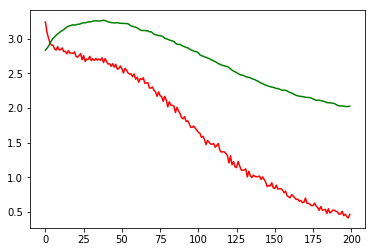

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

y_int_label = {idx:label for idx,label in enumerate(list(set(y)))}
y_label_int = {label:idx for idx,label in enumerate(list(set(y)))}
y_int = [y_label_int[label] for label in y]
print(y_int_label)
print(y_label_int)
print(y_int)

num_classes = len(set(y_int))
vectorizer = TfidfVectorizer()
x_vect = vectorizer.fit_transform(x)
y_vect = to_categorical(y_int)

x_train,x_test, y_train, y_test = train_test_split(x_vect, y_vect, test_size=0.33)

print(num_classes)

print(x_train.shape)
print(x_test.shape)

model = Sequential()
model.add(Dense(128, activation='sigmoid', input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
num_epochs = 200
model_history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_split=0.25, verbose=1)

train_loss = model_history.history['loss']
val_loss   = model_history.history['val_loss']
train_acc  = model_history.history['acc']
val_acc    = model_history.history['val_acc']
xc         = range(num_epochs)

score = model.evaluate(x_test, y_test)

print('accuracy ',score[1])

predictions = model.predict(x_test)
for i,pred_y in enumerate(predictions):
    max_pred = np.argmax(pred_y)
    print(' prediction ', y_int_label[max_pred])
    
plt.figure()
plt.plot(xc, train_loss, color='red')
plt.plot(xc, val_loss, color='green')
plt.show()
